## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [9]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
del gdp_df['Value Footnotes']

In [12]:
gdp_df.rename(columns = {'Country or Area' : 'Country','Value' : 'GDP_Per_Capita'})

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [14]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [15]:
gdp_df['Year'].value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

In [16]:
gdp_df['Country or Area'].nunique()

247

In [17]:
gdp_df['Year'].nunique()

34

In [18]:
# 233 countries have data for all years

In [19]:
# Countries missing many years of data
gdp_df['Country or Area'].value_counts()

Country or Area
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

In [20]:
# only 2013-2021 have data for all countries

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

<Axes: xlabel='Year', ylabel='Value'>

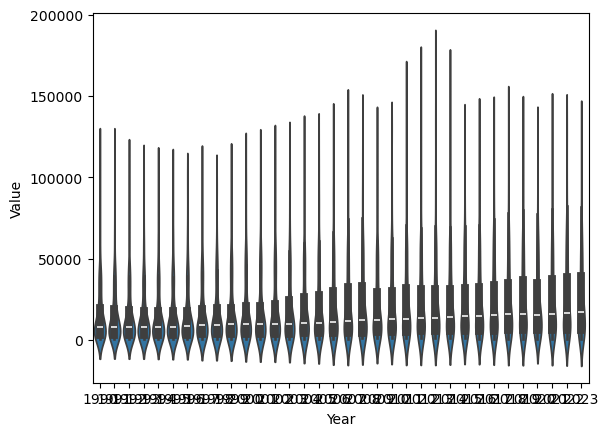

In [59]:
sns.violinplot(x = gdp_df['Year'],y = gdp_df['Value'])

interactive(children=(Dropdown(description='Year', options=('Year', 'Country or Area', 'Value'), value='Year')…

<function __main__.histogram(Year)>

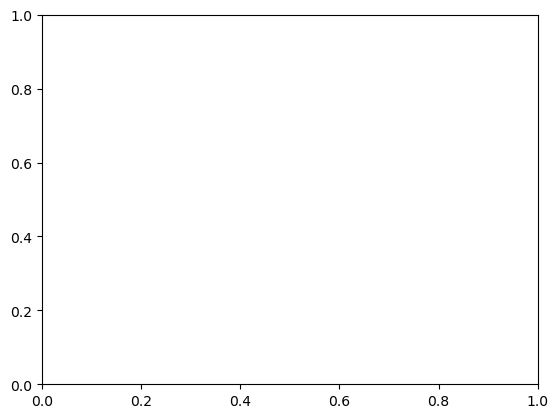

In [83]:
#Tried a mathplotlib and no bueno
columns = ["Year", "Country or Area", "Value"]

def histogram(Year):
    fig, ax = plt.subplots()
    ax.hist(gpd_df, x = Year, color = "Value")
    plt.show()

interact(histogram, Year=columns)


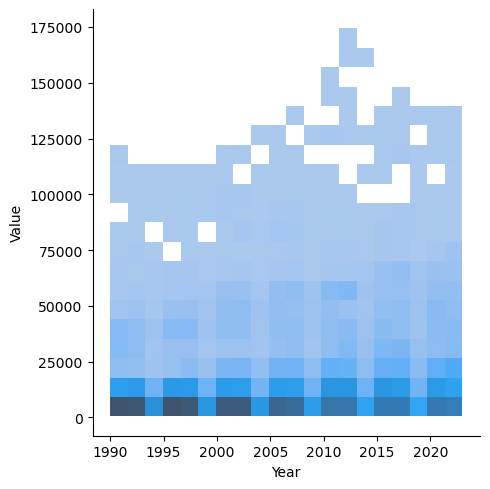

In [65]:
sns.displot(x = gdp_df['Year'],y = gdp_df['Value'], bins = 20)

<Axes: xlabel='Year', ylabel='Density'>

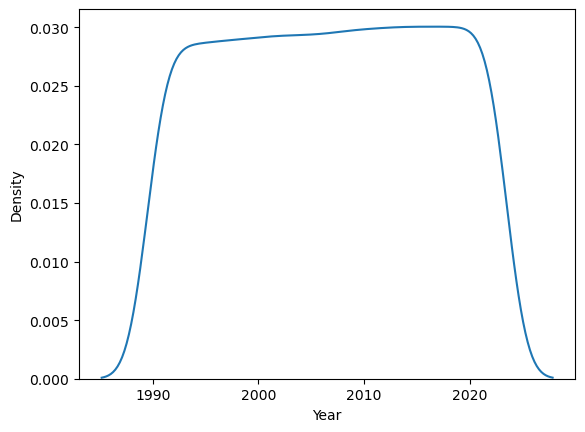

In [85]:
sns.kdeplot(gdp_df["Year"])

<Axes: xlabel='Year', ylabel='Value'>

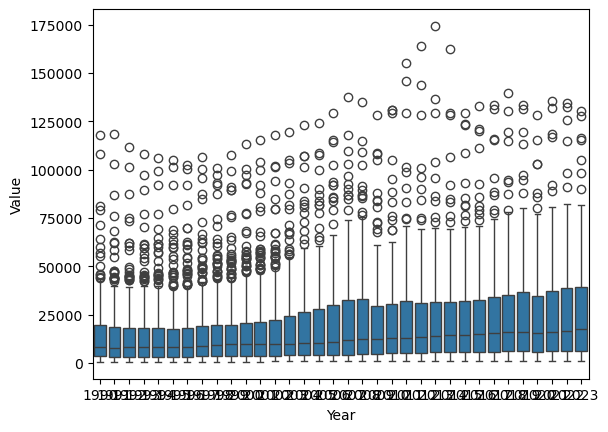

In [191]:
sns.boxplot(x=gdp_df['Year'], y=gdp_df['Value'])

9. What was the median GDP per capita value in 2020?

In [159]:
gdp_df.groupby('Year')['Value'].median()

Year
1990     8243.732655
1991     7892.844113
1992     8069.014443
1993     8241.548300
1994     8058.611401
1995     8160.313528
1996     8446.316579
1997     8979.649300
1998     9360.690499
1999     9544.937217
2000     9576.509216
2001     9661.779060
2002     9757.546918
2003     9827.990797
2004    10277.999952
2005    10527.474837
2006    11075.353901
2007    11754.139024
2008    12307.859128
2009    12550.273271
2010    13032.493476
2011    13095.946470
2012    13377.398815
2013    13804.791297
2014    14247.101002
2015    14545.381145
2016    15016.092064
2017    15424.055430
2018    15963.622908
2019    16215.360797
2020    15309.235988
2021    15900.976581
2022    16676.092080
2023    17458.086205
Name: Value, dtype: float64

In [ ]:
# the GDP per capital in 2020 is 15,309.235988

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [175]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_decades.head()

,Country or Area,Year,Value
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012


<Axes: xlabel='Year', ylabel='Value'>

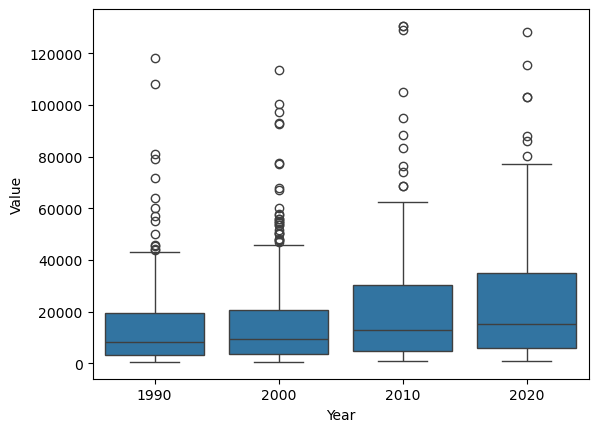

In [189]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['Value'])